<a href="https://colab.research.google.com/github/SebasLion/Simulacion_1_Sebas/blob/main/Estimar_Pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimacion $\pi$
(imagen)    

$$y = \sqrt{1-x^2}, \text{ si } 0 \leq x \leq 1$$

### Procedimiento:
1. Generar $u_1 , u_2 ; u_1 ,u_2 \sim U(O,1)$
2. Éxito: $u_2 \leq \sqrt{1 - u_1 ^2 }$
3. Hacerlo N veces.

$$ \frac{A_o}{A_{⊓}} \approx \frac{n}{N} \\ A_0 = 1, A_{⊓} = \frac{\pi}{4} \\ 4 \frac{n}{N} = \pi $$

# Analíticamente

(imagen)[código]

# Estimador
$$\pi = \frac{4n}{N}$$

Analíticamente:

Consideramos la variable:
$$X_{i} = \Biggl\{\begin{array}{c} 1 \sim \text{si } 190≤x<210 \\ 0 \end{array}$$

Ahora consideramos:
$$ z = 4 \frac{x_1 + x_2 + \cdots + x_n}{N}$$

Y calculamos el valor esperado y la varianza:

$$E[z_n] = \frac{4}{n}(E[x_1] + \cdots + E[x_n]) \\ E[z_n] = \frac{4}{N} Np = 4p \\ \boxed{ E[z_n] = 4p}$$

### Nota:
$$E[x_i] = 1\cdot p + 0 \cdot(1-p) = p \\          V[x_i] = E[x_i ^2] - E[x_i]^2 \\ = (1^2 \cdot p + 0^2 \cdot( 1 - p )) - p^2 \\ p-p^2 = \boxed{ p(1-p) }  $$
### se acaba nota

# Calculamos la varianza

$$V[z_n] = \frac{16}{N^2}(V[x_1] + \cdots + V[x_n])\\\ V[z_n] = \frac{16}{N^2} \cdot Np(1-p) \\ \boxed{ V[z_n] = \frac{ 16p(1-p)}{N} }$$

Ahora podemos usar la desigualdad de Chebyshev:
$$ P(|Z_n - E[z_n] | \geq \epsilon) \leq \frac{V[z_n]}{\epsilon ^2}  \\ \boxed{P(|Z_n - π | \geq \epsilon) \leq \frac{16p(1-p)}{N \epsilon ^2} } $$

(Imagen)

Luego, dando un valor de $\epsilon$ podemos calcular el valor de N.



# Ejemplo:
¿Cuántas dardos hay que lanzar para que la probabilidad de cometer un error mayor o igual que 0.1 sea menor que 0.01?

## Conocemos p
(Supongamos que sabemos que $p = \pi$)

\textred{ \epsilon es el error o la desviación estándar}
Sol:
$$\epsilon = 0.1 \\ P(|z_n - \pi| \geq \epsilon ) = 0.01 \\ \Longrightarrow N = \frac{16 p(1-p)}{ P(|z_n - \pi| \geq \epsilon } \cdot \epsilon ^2 = \frac{16 \frac{\pi}{4} (1 - \frac{\pi}{4}) }{0.01 (0.1)^2 } \\ N \approx 26,000$$

## Sin conocer P

Si no conocemos p, analizamos.

Sabemos que $0 < p < 1$

Veamos cómo es $p(1-p)$

(Dibujo)

Esto significa que: $$ p(1-p) \leq \frac{1}{4}$$

Volvemos a calcular:
$$N =
\leq \frac{ 16 \frac{1}{4} }{0.01(0.1)^2} = 40,000$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

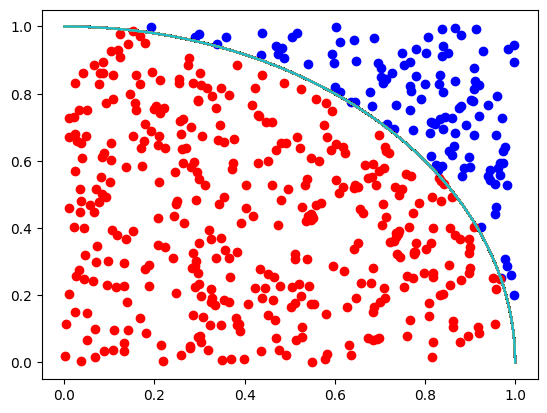

In [2]:
x=np.linspace(0,1,1000)
for i in range(500):
  u1=rnd.random()
  u2=rnd.random()
  if u2 <= np.sqrt(1-u1**2):
    plt.plot(x,np.sqrt(1-x**2))
    plt.scatter(u1,u2, color="red")
  else:
    plt.plot(x,np.sqrt(1-x**2))
    plt.scatter(u1,u2, color="blue")
plt.show()

In [31]:
def pi(n):
  l=[]
  exitos=0
  for i in range(n):
    u1 = rnd.random()
    u2 = rnd.random()
    if u2 <= np.sqrt(1-u1**2):
      exitos+=1
    prob=exitos/(i+1)
    l.append(4*prob)
  return l

In [32]:
G=pi(1000)

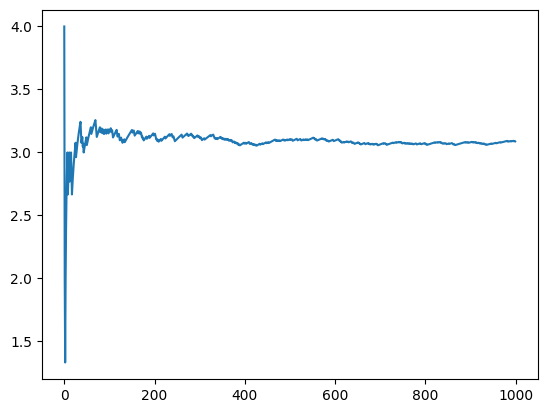

In [33]:
plt.plot ( G )
plt.show ()

Calculamos la media, la varianza y la desviación estándar de la estimación.

In [34]:
media=np.mean(G)
var=np.var(G)
dev=np.std(G)

In [35]:
print(media, var, dev) #Imprimimos los valores

3.088943147859607 0.00921213069913701 0.09597984527564633


In [36]:
#Establecemos el +- del erro
a=media+dev
b=media-dev

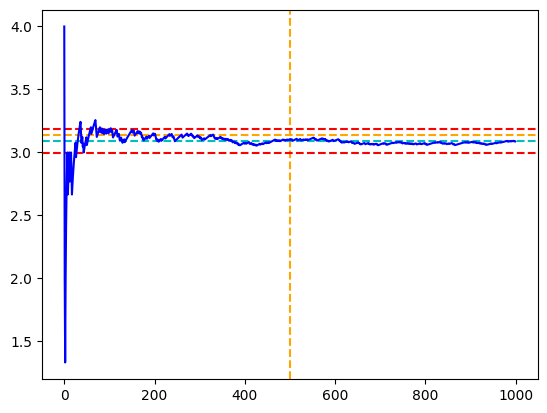

In [37]:
plt.axhline(3.1416, color="orange", linestyle="--")
plt.axvline(x=500, ymin=0, ymax=3.6, linestyle="--", color="orange")
plt.axhline(a, color="red", linestyle="--")
plt.axhline(b, color="red", linestyle="--")
plt.axhline(media, color="c", linestyle="--")
plt.plot(G, "b-")
plt.show()

# Se ve una muestra considerable de tamaño N≈500 donde da un resultado aceptable

In [39]:
#Para modificar la función y convertirla en una corrida de simulación
#Solo nos muestra la probabilidad
def simulacion(N):
  l2=[]
  exitos=0
  for j in range(N):
    u1=rnd.random()
    u2=rnd.random()
    if u2<=np.sqrt(1-u1**2):
      exitos=exitos+1
    prob=exitos/(j+1)
    l2.append(4*prob)
  return prob

#Con ayuda de nuestra gráfica podemos fijar el valor se N=500

In [40]:
def sim(n):
  l3=[]
  for i in range(n):
    R=simulacion(500)
    l3.append(R)
  return l3

In [48]:
H=sim(10000)


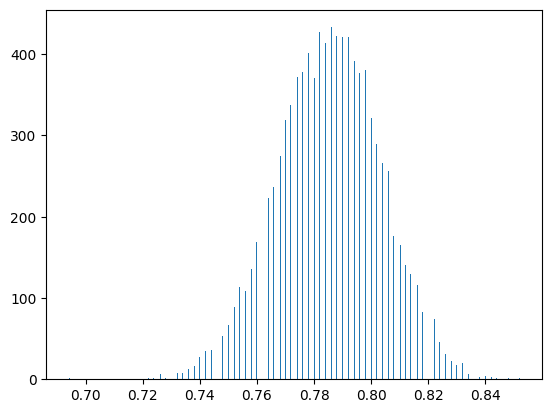

In [47]:
g=plt.hist(H, bins=500)

## ¿Qué distribución es?

Aparentemente es una distribución normal.